# Speech-based-stress-detection-using-a-cross-modal-transfer-learning-approach: Generating images from audio files

In [164]:
from IPython.display import Audio
import librosa
import glob
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [165]:
SAMPLE_RATE = 16000
DIR_AUDIOS = '../data/processed_audios/'

## Reading directory files

In [166]:
files_audios = [(f, (f.split('/')[-1]).split('.')[0]) for f in glob.glob(DIR_AUDIOS + "*.wav")]
print(f'Number audio files: {len(files_audios)}')

Number audio files: 32


## Selecting an example file

In [167]:
example_file = files_audios[2]
example_file

('../data/processed_audios/ID_852630991_baseline.wav', 'ID_852630991_baseline')

## Loading an audio file

In [168]:
clip, sample_rate = librosa.load(example_file[0], sr=SAMPLE_RATE)

print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(len(clip)/sample_rate))

Sample Rate   16000 Hz
Clip Length   112.00 seconds


## Plotting audio data

In [169]:
n_chunk = 10
clip_one_second = clip[n_chunk*sample_rate:(n_chunk+1)*sample_rate]

Text(0.5, 1.0, 'One second chunk: ID_852630991_baseline (16000 samples)')

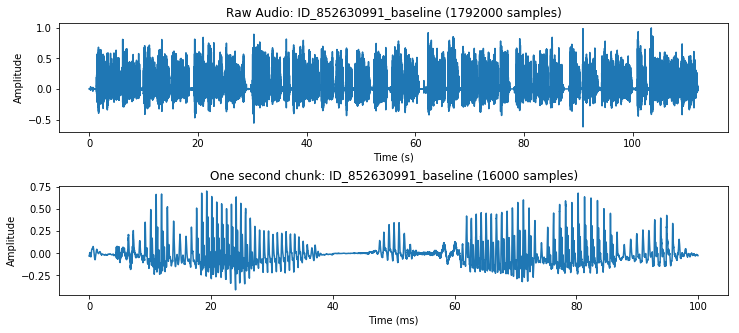

In [170]:
fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# plot the entire clip 
timesteps = np.arange(len(clip)) / sample_rate  # in seconds
ax[0].plot(timesteps, clip)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format(example_file[1], len(clip)))

# plot the one second clip 
timesteps = np.arange(len(clip_one_second)) * 100.0 / sample_rate  # in miliseconds
ax[1].plot(timesteps, clip_one_second)
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('One second chunk: {} ({} samples)'.format(example_file[1], len(clip_one_second)))


## Generating the spectrogram

We check the trade-off between time and frequency resolution. The greater the n_fft, the lower the time resolution.

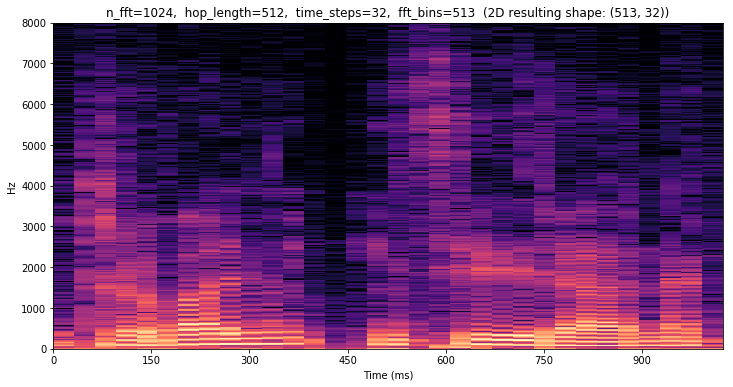

In [171]:
n_fft = 1024 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

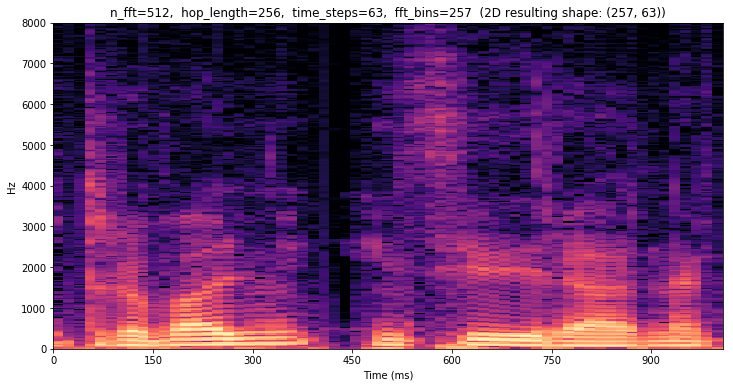

In [172]:
n_fft = 512 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

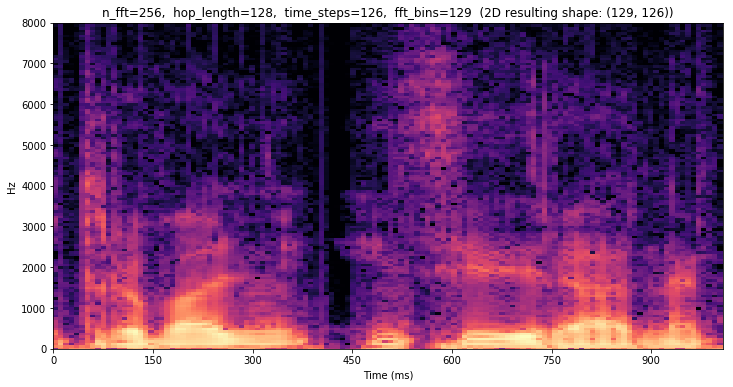

In [173]:
n_fft = 256 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

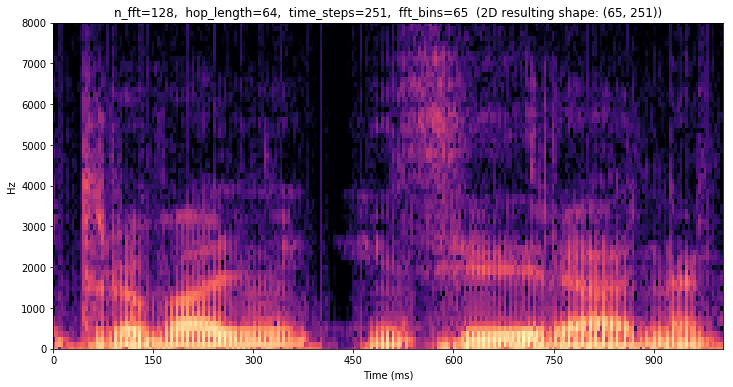

In [174]:
n_fft = 128 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

## Generating the melspectrogram

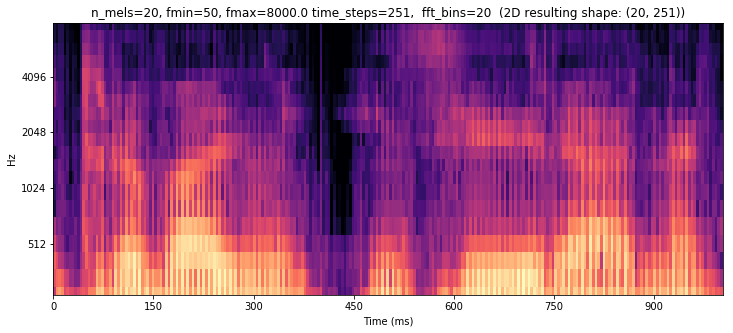

In [175]:
plt.figure(figsize=(12, 5))

n_mels = 20  # number of Mel bands to generate

fmin = 50           
fmax = sample_rate/2
mel_spec = librosa.feature.melspectrogram(clip_one_second, n_fft=n_fft, hop_length=hop_length,
                                          n_mels=n_mels, sr=sample_rate, power=1.0,
                                          fmin=fmin, fmax=fmax)

mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, x_axis='ms',  y_axis='mel', 
                         sr=sample_rate, hop_length=hop_length, 
                         fmin=fmin, fmax=fmax)

title = 'n_mels={}, fmin={}, fmax={} time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_mels, fmin, fmax, mel_spec_db.shape[1], mel_spec_db.shape[0], mel_spec_db.shape));


## Saving an image for training the model

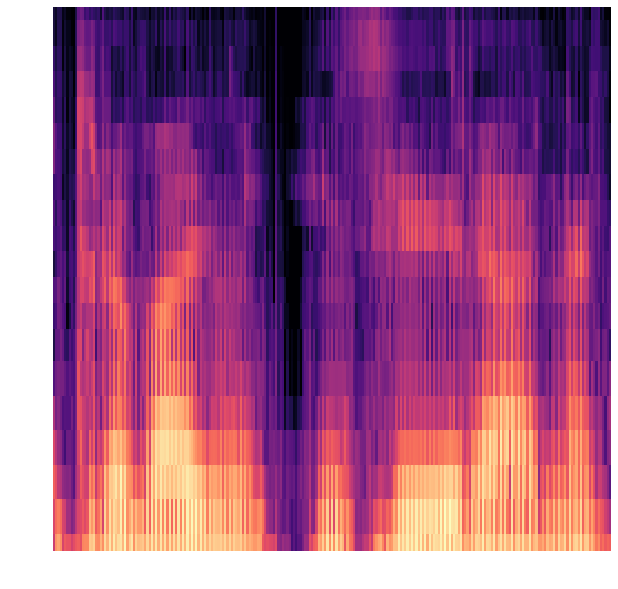

In [177]:
plt.figure(figsize=(10, 10))

n_mels = 20  # number of Mel bands to generate

fmin = 20          
fmax = sample_rate/2
mel_spec = librosa.feature.melspectrogram(clip_one_second, n_fft=n_fft, hop_length=hop_length,
                                          n_mels=n_mels, sr=sample_rate, power=1.0,
                                          fmin=fmin, fmax=fmax)

mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, x_axis='ms',  y_axis='mel', 
                         sr=sample_rate, hop_length=hop_length, 
                         fmin=fmin, fmax=fmax)
plt.axis('off')
plt.savefig('demo.png', transparent=True)

## Loading the png file to check dimensions

In [179]:
import PIL.Image
rgba_image = PIL.Image.open('demo.png')
np_im_rgba = numpy.array(rgba_image)
print('RGBA Image shape: ', np_im_rgba.shape)

rgb_image = rgba_image.convert('RGB')
np_im_rgb = numpy.array(rgb_image)
print('RGB Image shape: ', np_im_rgb.shape)

rgb_image.save('rgb_demo.png')

RGBA Image shape:  (720, 720, 4)
RGB Image shape:  (720, 720, 3)


(720, 720, 3)


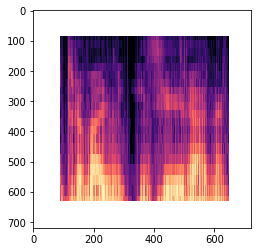

In [180]:
read_rgb_image = PIL.Image.open('rgb_demo.png')
np_im = numpy.array(read_rgb_image)
print(np_im.shape)
plt.imshow(np_im)